In [8]:
%matplotlib inline
import numpy as NPY
import matplotlib.pyplot as PLT

In [9]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

Task 1 below

In [10]:
def u_initial(nx):
    x=NPY.linspace(0,4,nx)
    Lower_half=NPY.where(x<2)
    Upper_half=NPY.where(x>=2)
    u=x
    u[Lower_half]=1
    u[Upper_half]=0
    return u

In [11]:
u = u_initial(81)
print(u)   

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [12]:
nx=81
nt=70
dx=4.0/(nx-1)

Task 2 below

In [13]:
computeF = lambda u: (u/2)**2 

#this is a function that gives us our flux that is being conserved 
#for the 1D Burgers eqn in Conservation form


In [14]:
computeF(2)

1.0

Task 3 Below: McCormack Function

In [15]:
def maccormack(u, nt, dt, dx):
    un=NPY.zeros((nt, len(u)))   #nt by nx matrix 70X81
    un[:]=u.copy()                 #makes every row in the un matrix equal to u array 
    ustar=u.copy()                 # is a copy of my u array 1X81
    
    for i in range (1, nt):
        F=computeF(u)           #Creating a Flux Array 1X81
        
        ustar[:-1]= u[:-1]-(dt/dx)*(F[1:]-F[:-1])     
                
        Fstar=computeF(ustar)
        
        un[i][1:]= (0.5)*(u[1:]+ustar[1:]-(dt/dx)*(Fstar[1:]-Fstar[:-1]))   
              
        u = un[i].copy()            
    return un

In [16]:
def animate(data):
    x = NPY.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


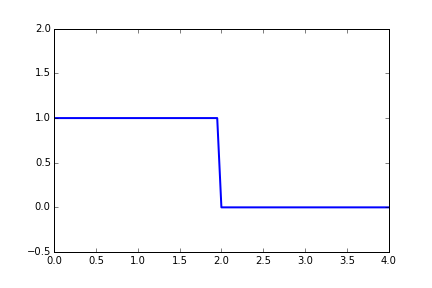
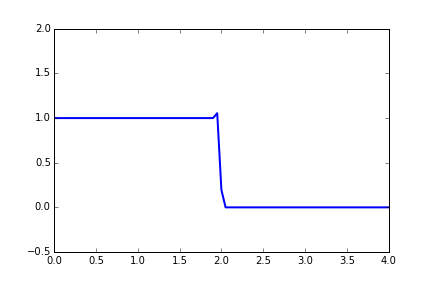
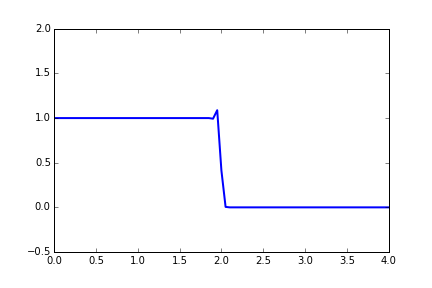
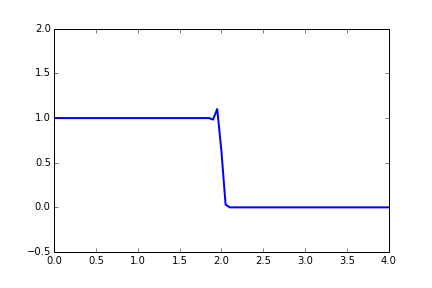
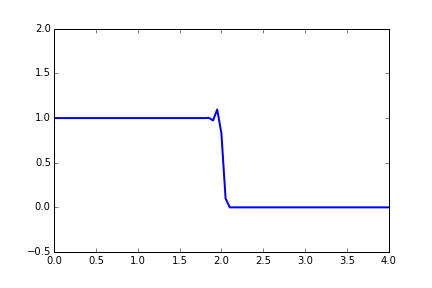
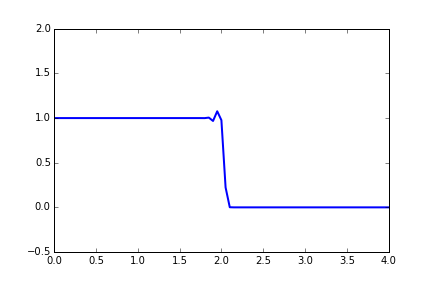
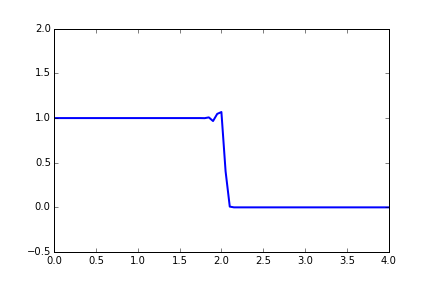
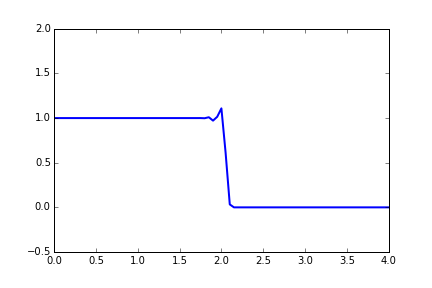
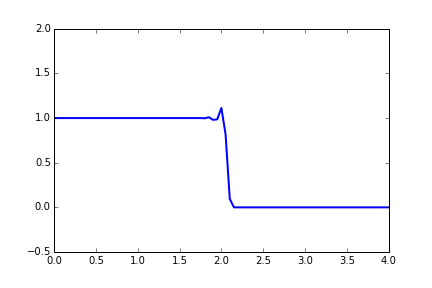
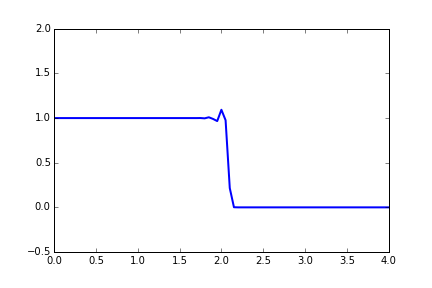
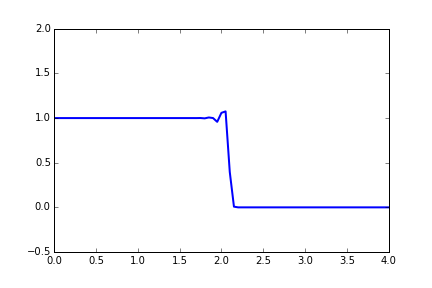
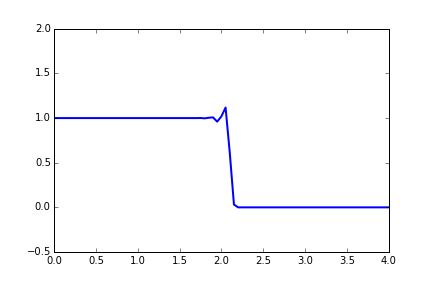
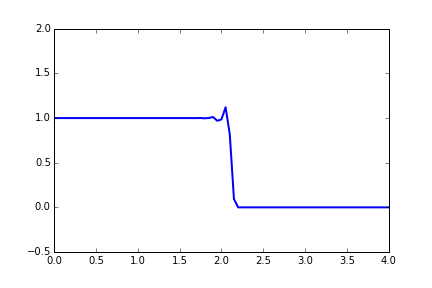
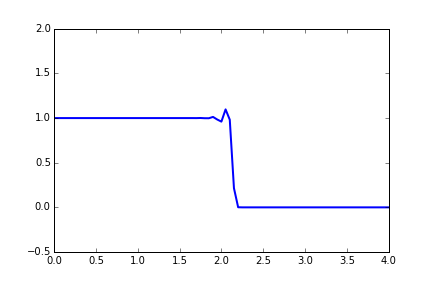
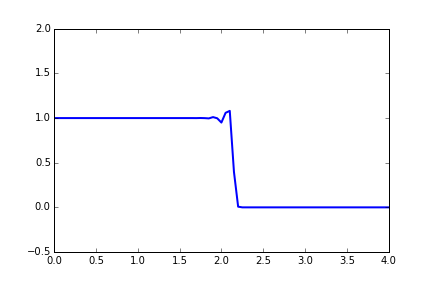
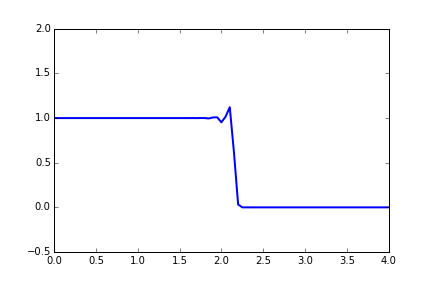
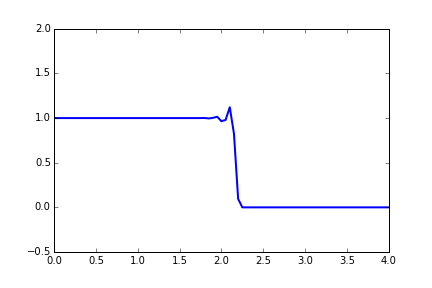
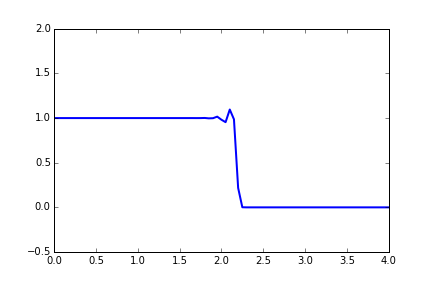
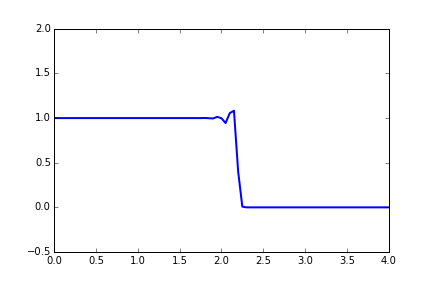
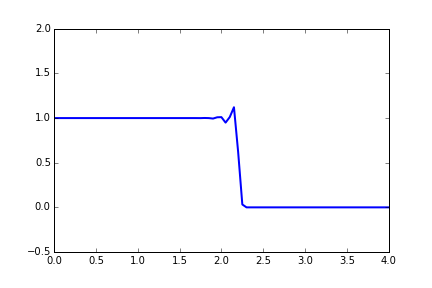
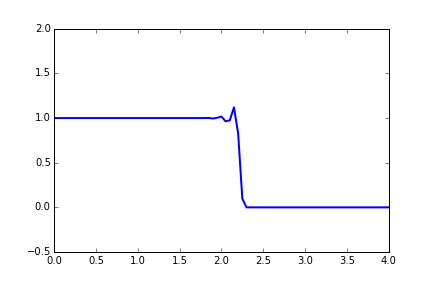
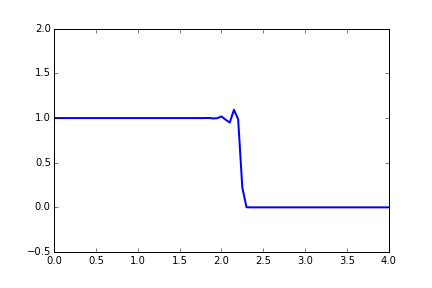
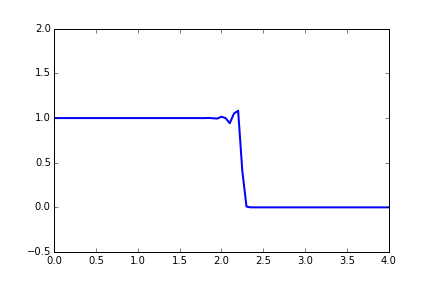
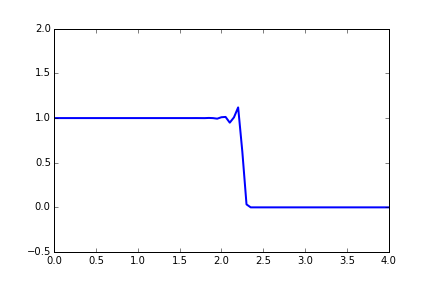
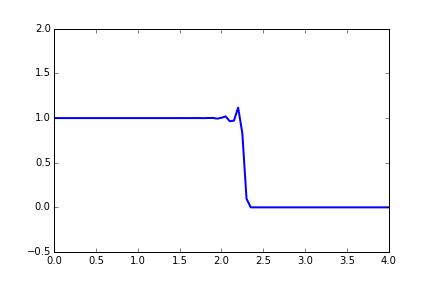
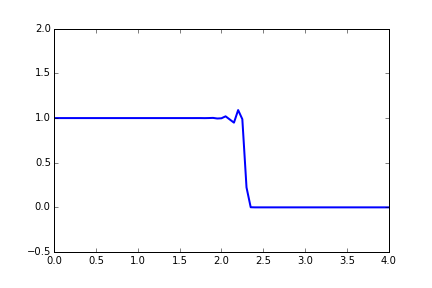
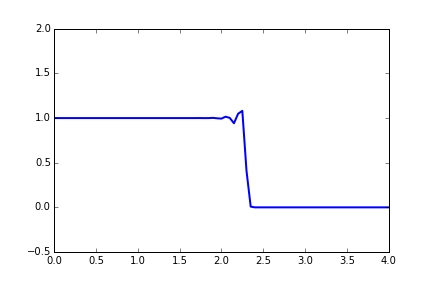
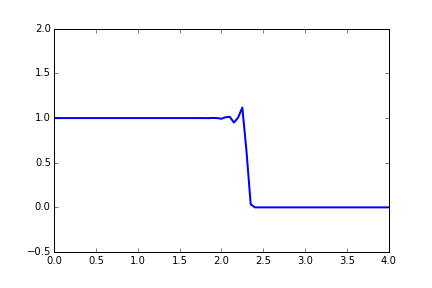
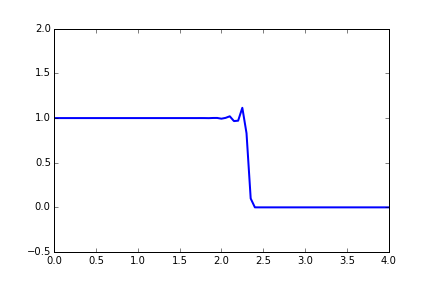
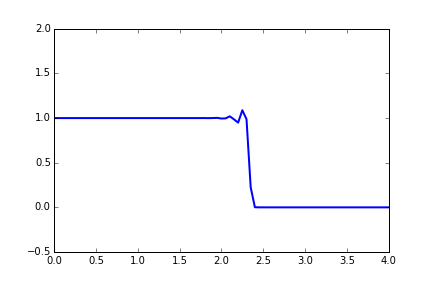
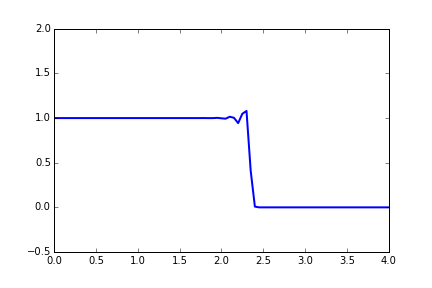
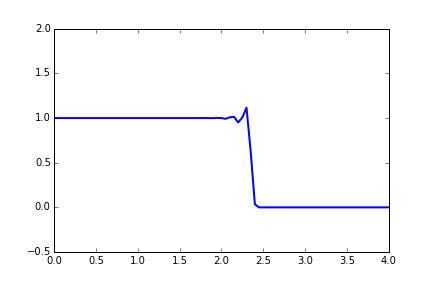
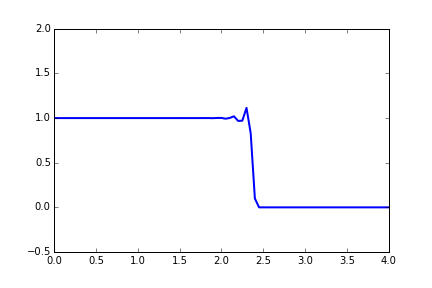
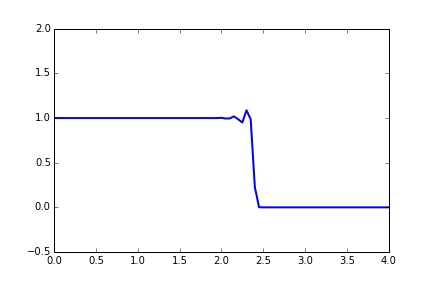
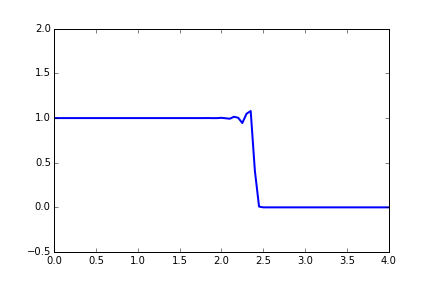
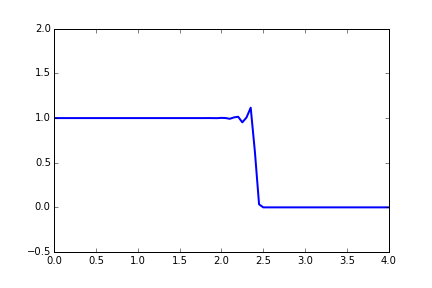
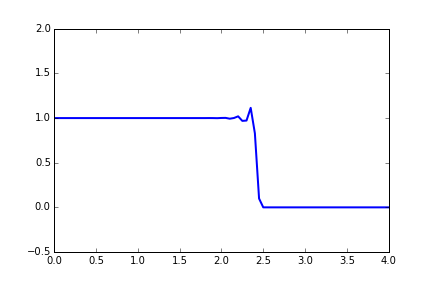
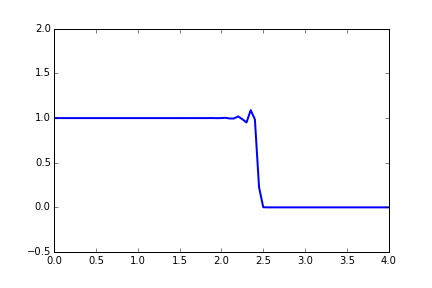
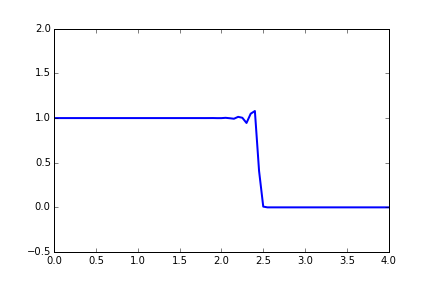
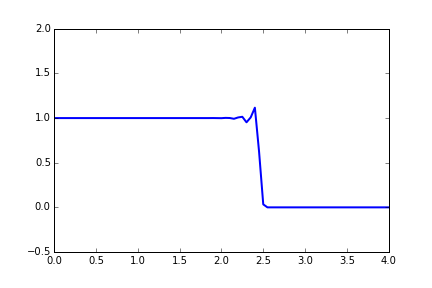
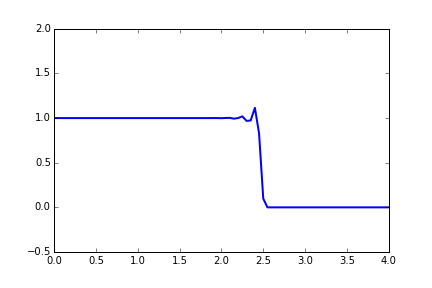
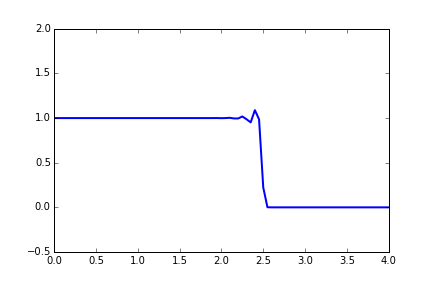
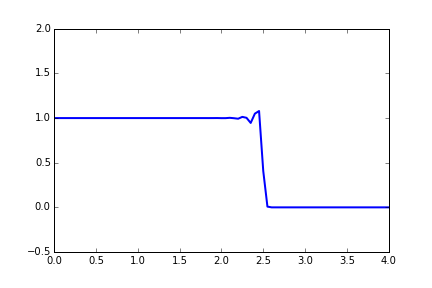
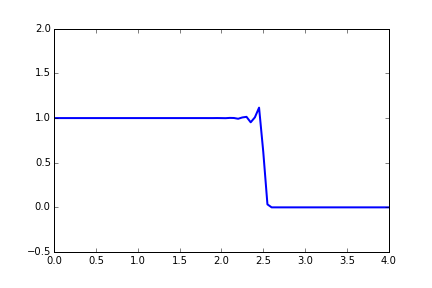
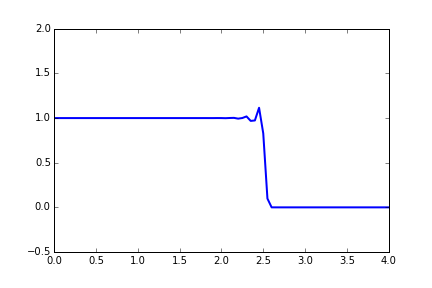
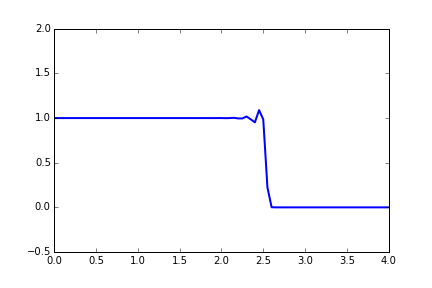
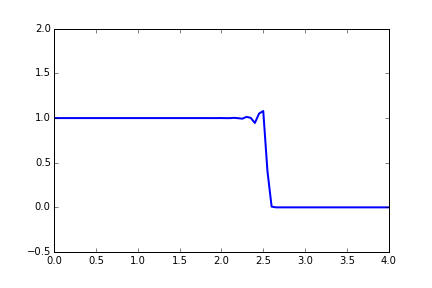
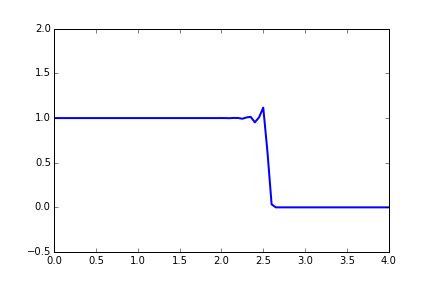
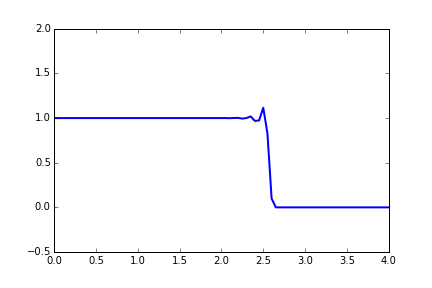
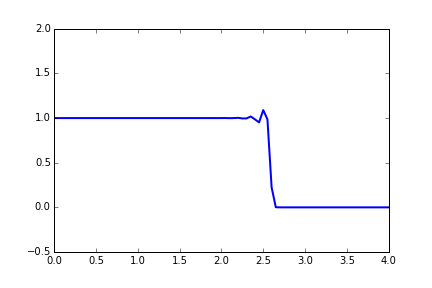
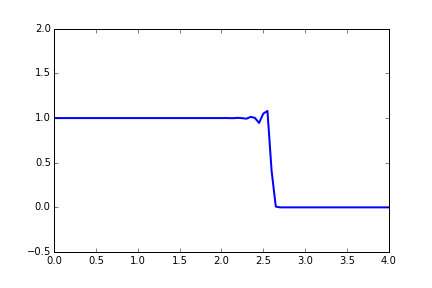
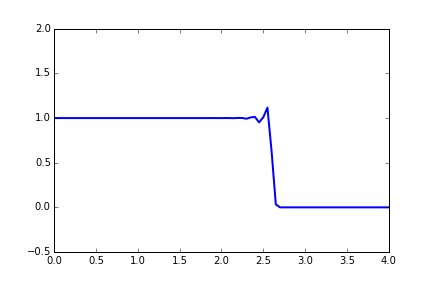
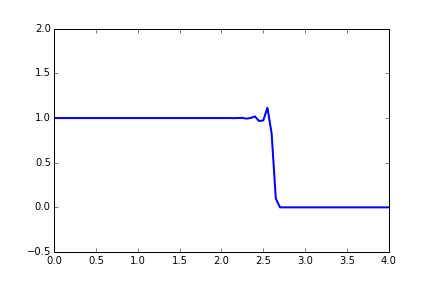
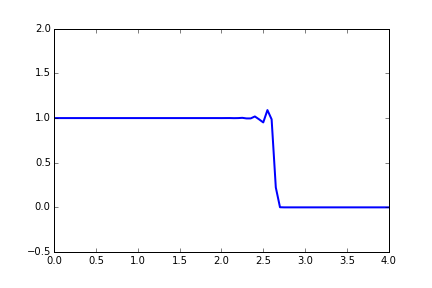
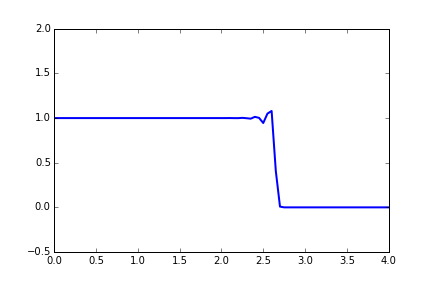
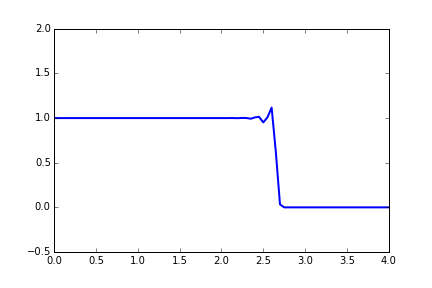
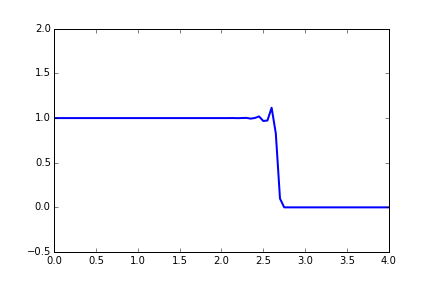
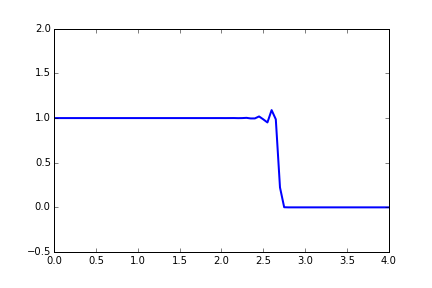
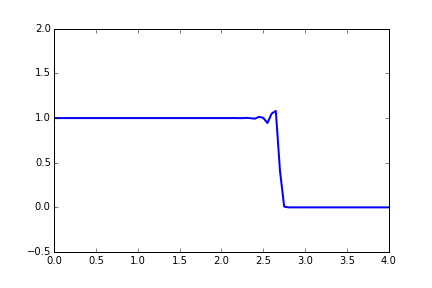
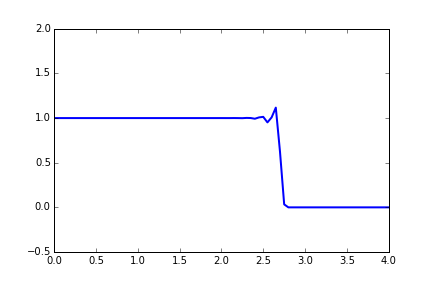
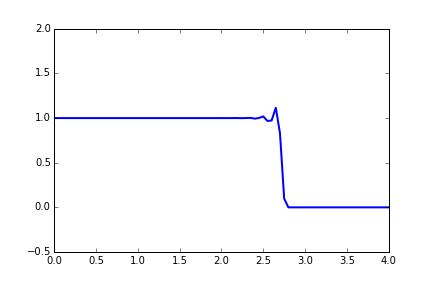
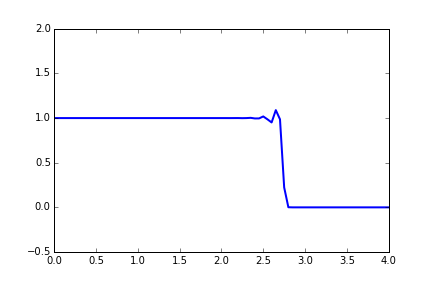
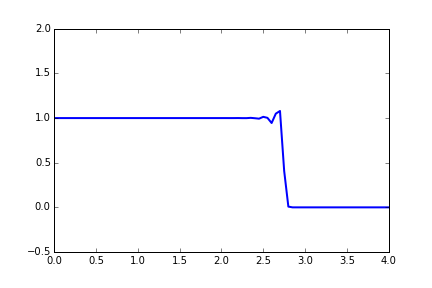
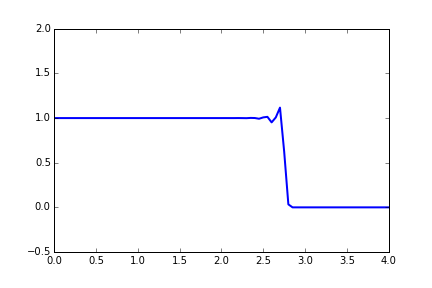
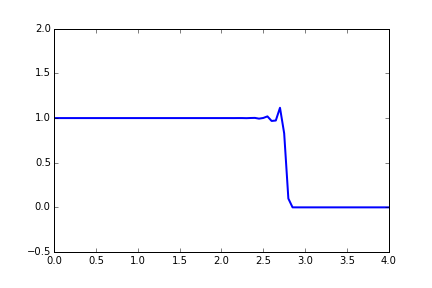
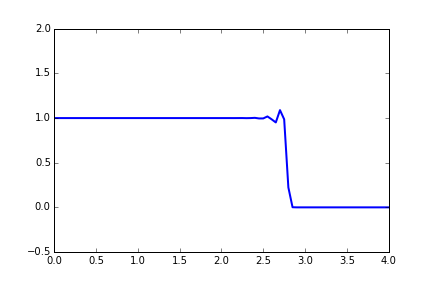
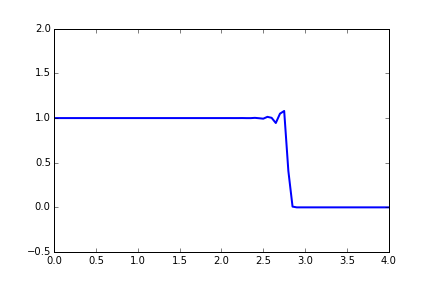
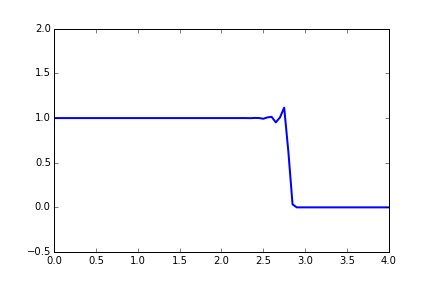
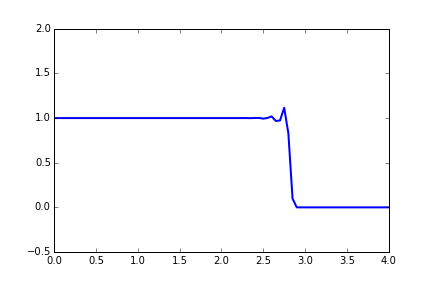
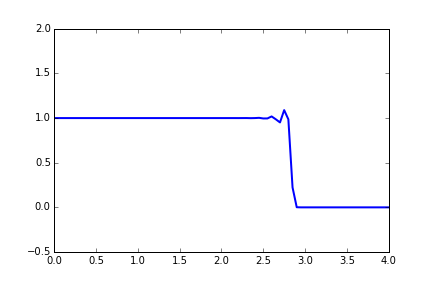

In [17]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = PLT.figure();
ax = PLT.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [18]:
def maccormack(u, nt, dt, dx, e):
    un=NPY.zeros((nt, len(u)))   #nt by nx matrix 70X81
    un[:]=u.copy()                 #makes every row in the un matrix equal to u array 
    ustar=u.copy()                 # is a copy of my u array 1X81
    
    for i in range (1, nt):
        F=computeF(u)           #Creating a Flux Array 1X81
        
        ustar[:-1]= u[:-1]-(dt/dx)*(F[1:]-F[:-1])     
                
        Fstar=computeF(ustar)
        
        un[i][1:-1]= (0.5)*(u[1:-1]+ustar[1:-1]-(dt/dx)*(Fstar[2:]-Fstar[:-2]))*e*(u[2:] + u[1:-1] + u[-2])   
              
        u = un[i].copy()            
    return un

C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: invalid value encountered in subtract
C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in multiply
C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in add
C:\Users\ctiu\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: overflow encountered in add



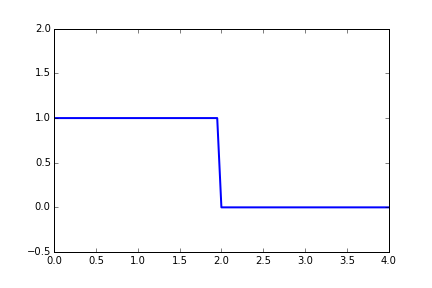
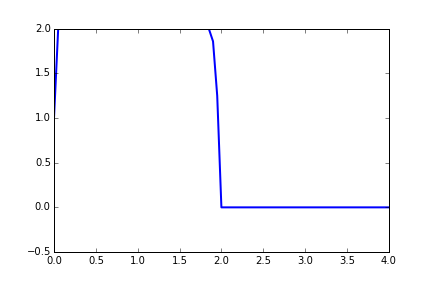
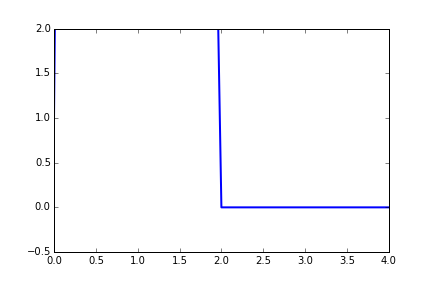
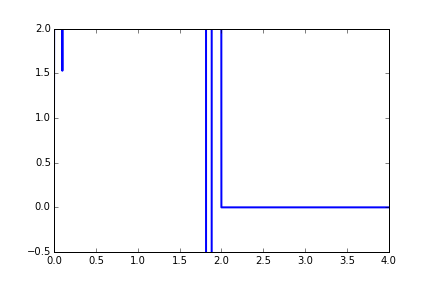
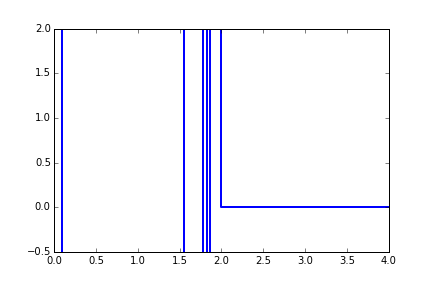
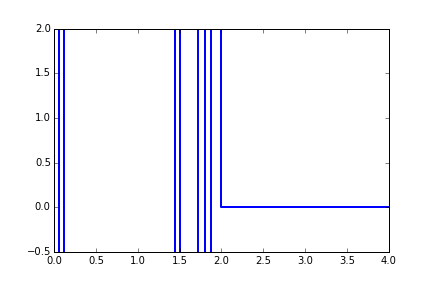
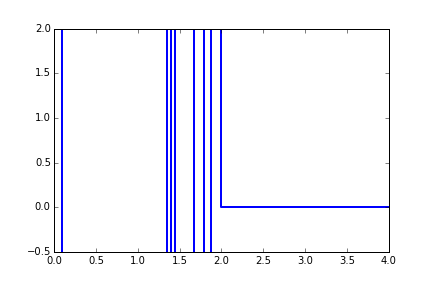
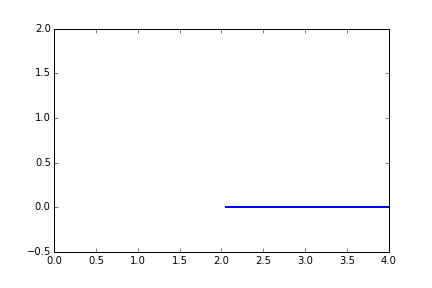
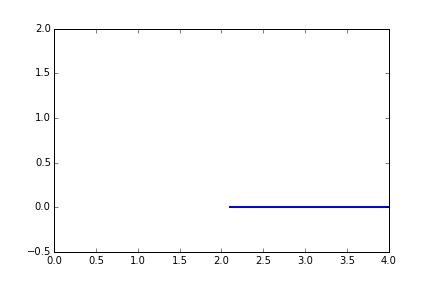
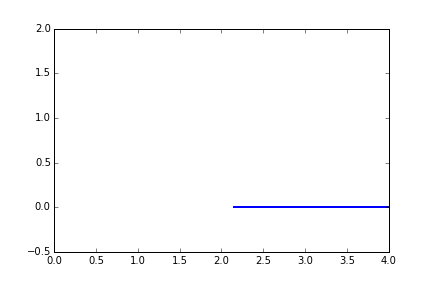
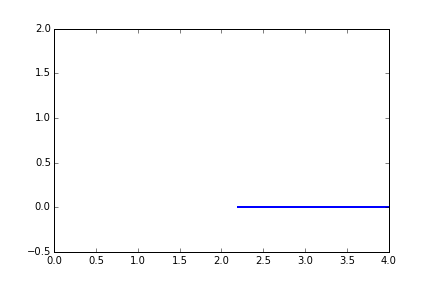
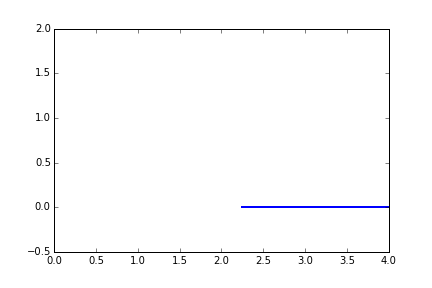
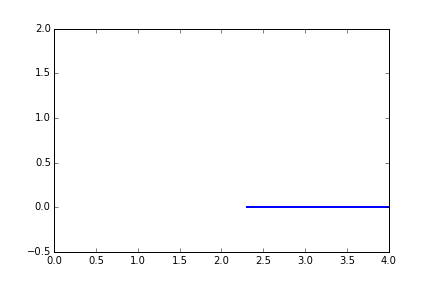
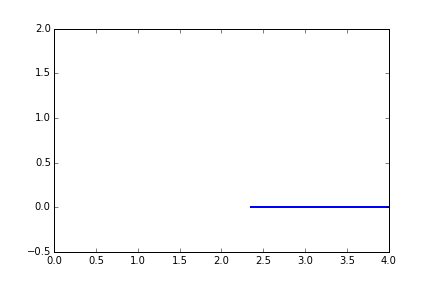
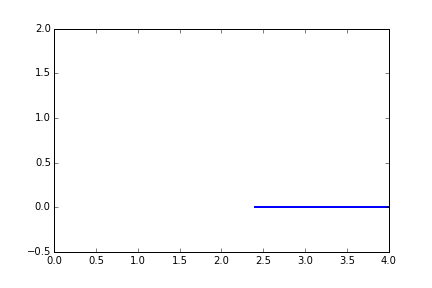
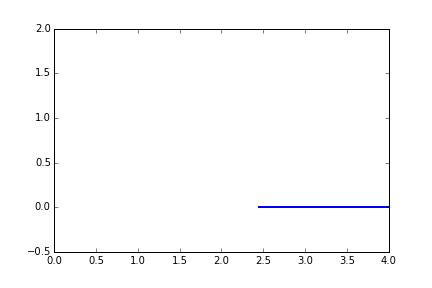
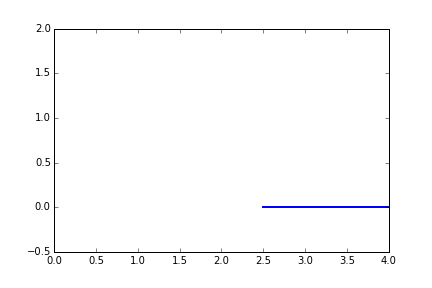
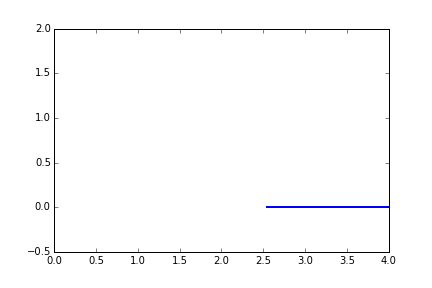
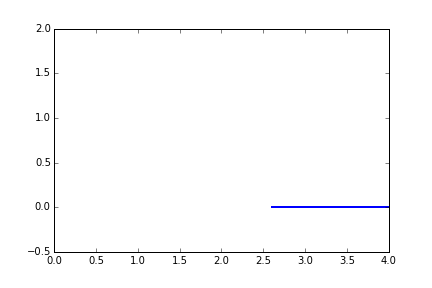
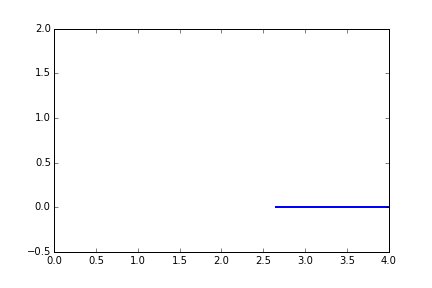
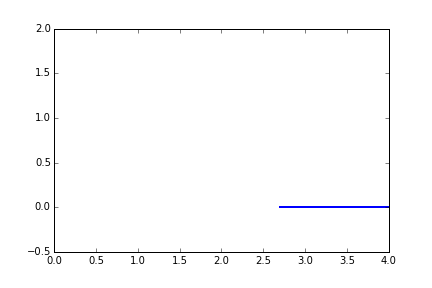
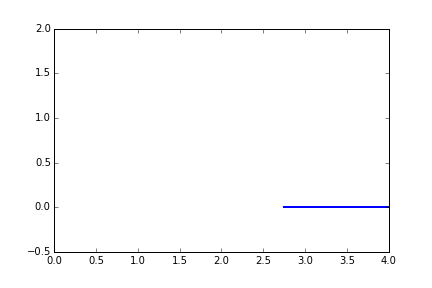
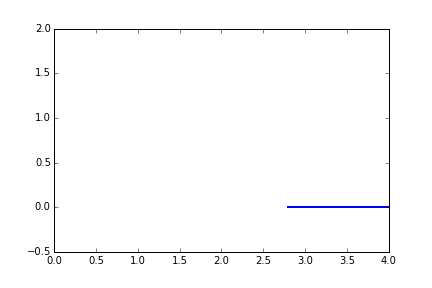
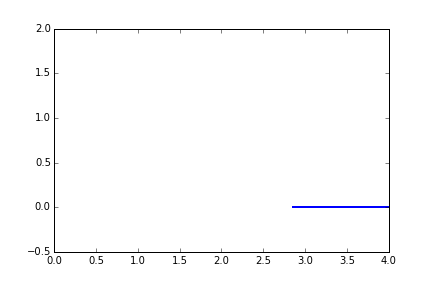
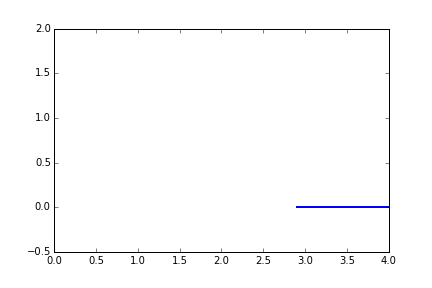
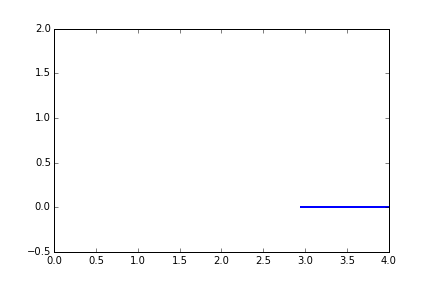
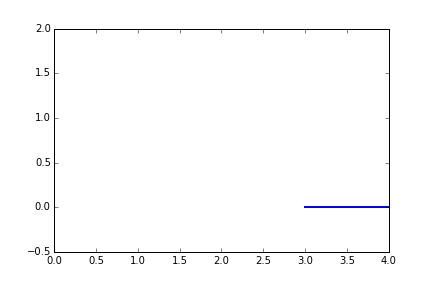
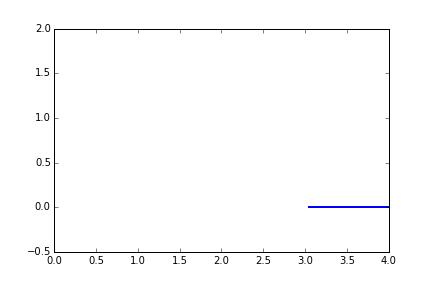
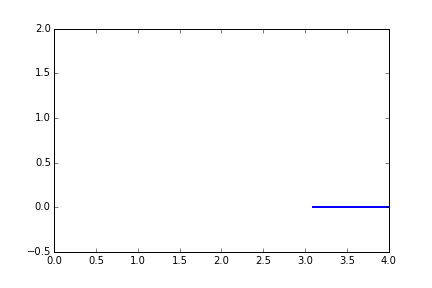
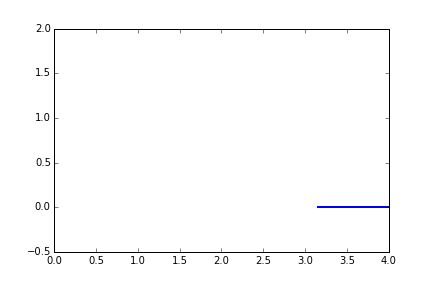
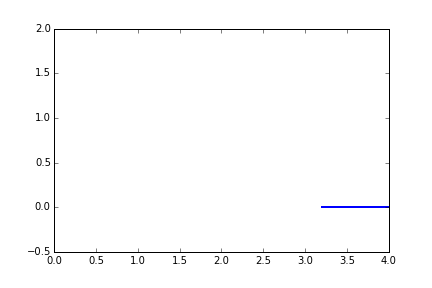
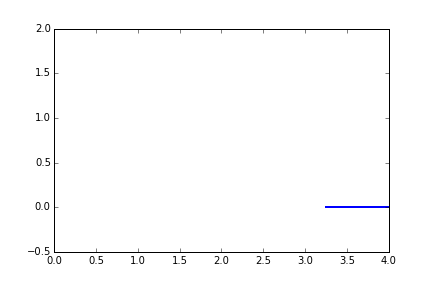
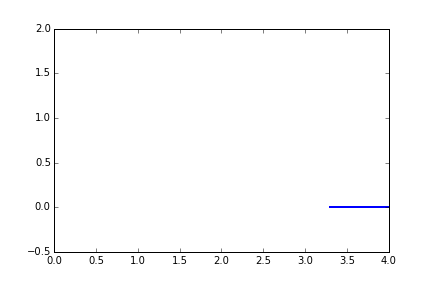
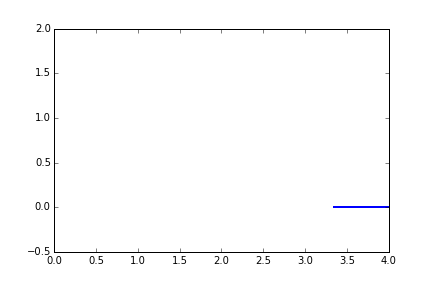
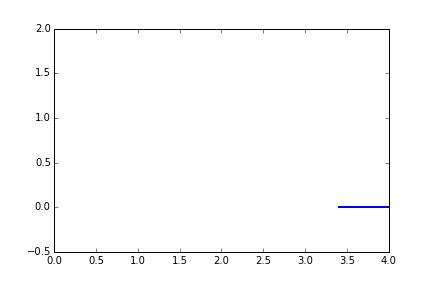
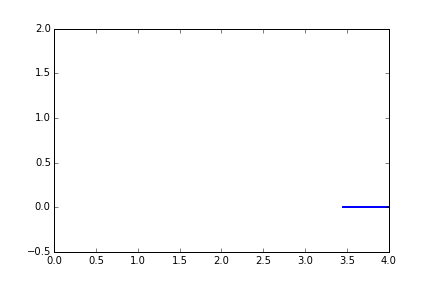
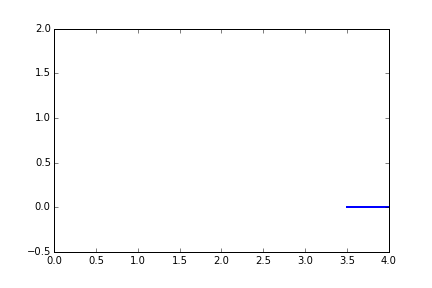
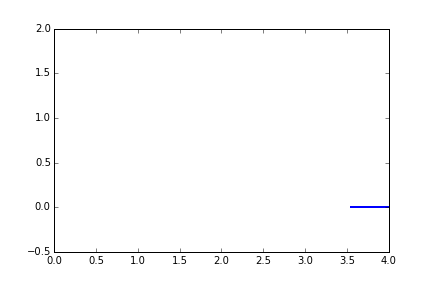
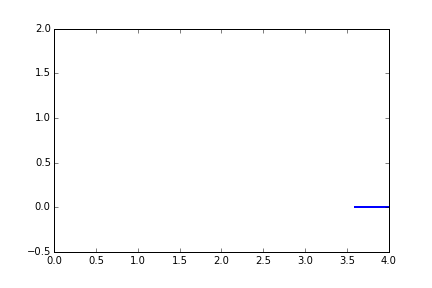
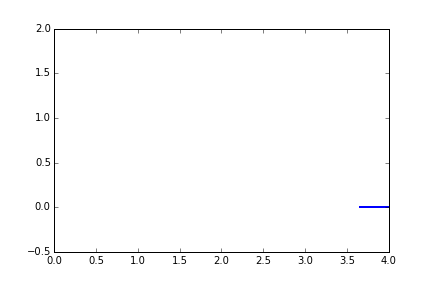
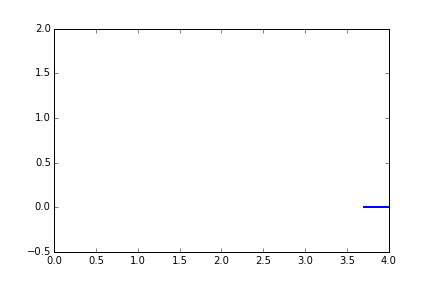
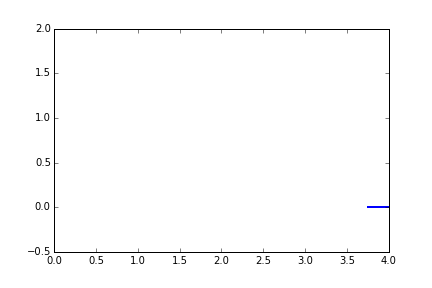
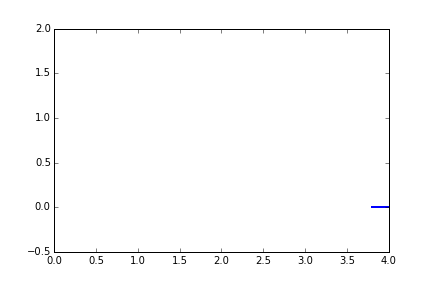
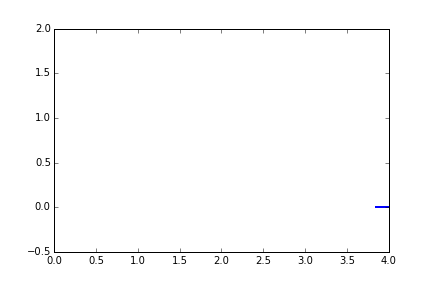
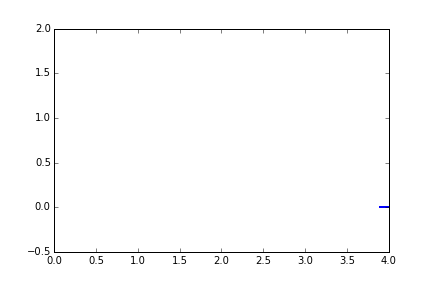
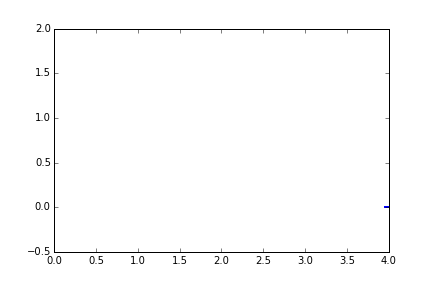
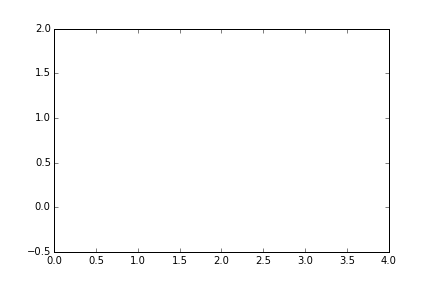
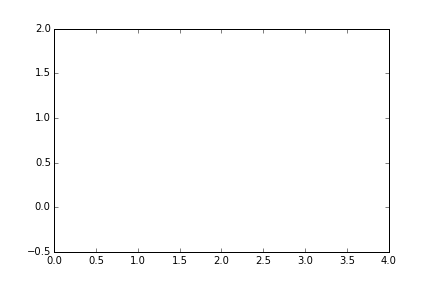
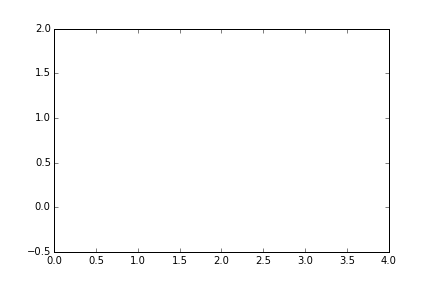
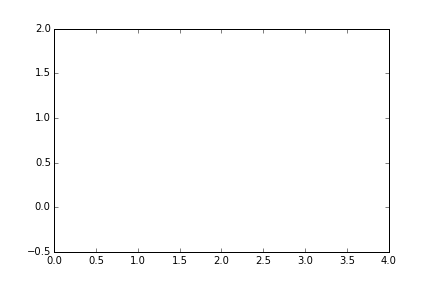
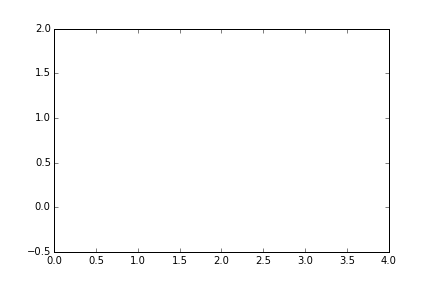
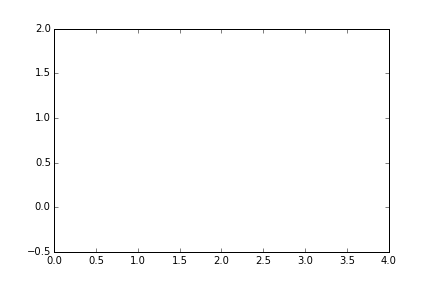
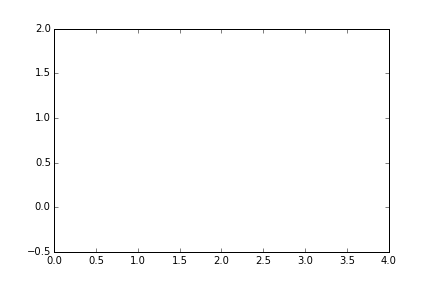
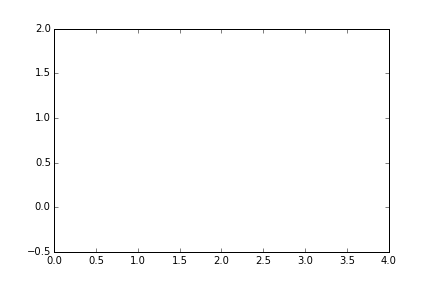
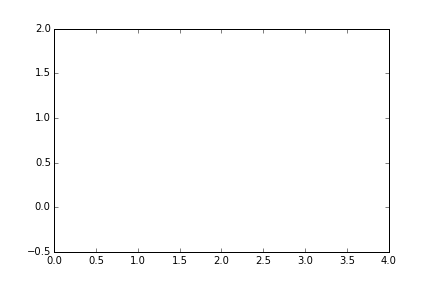
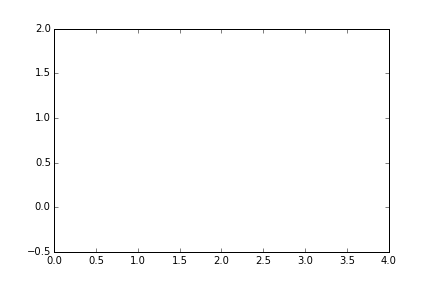
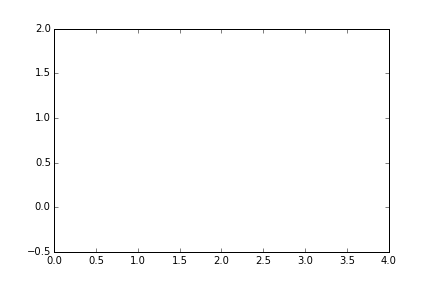
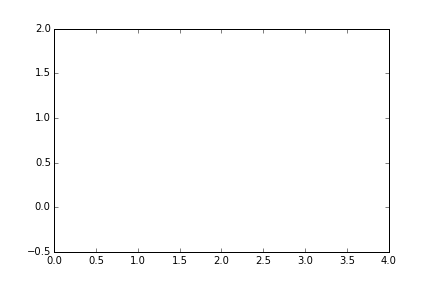
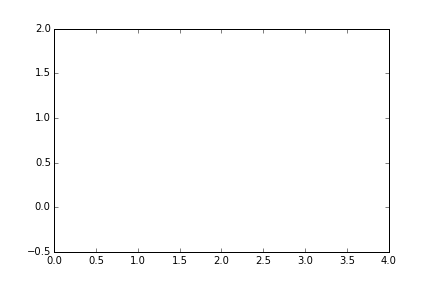
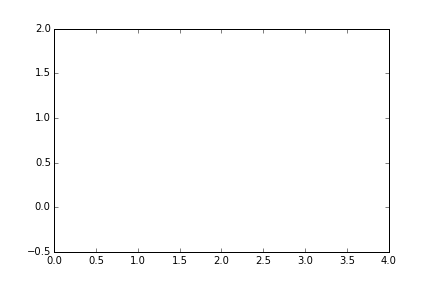
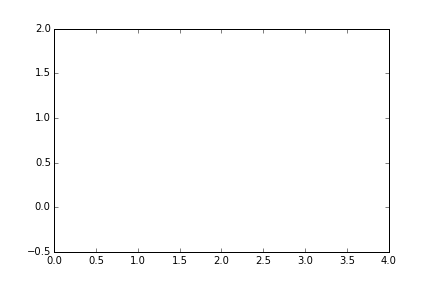
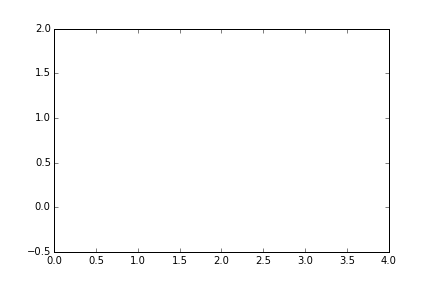
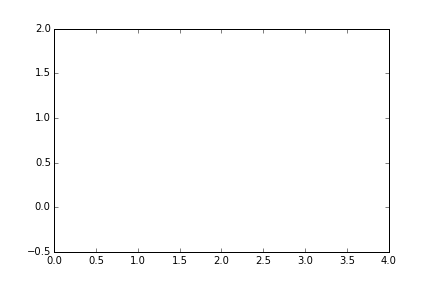
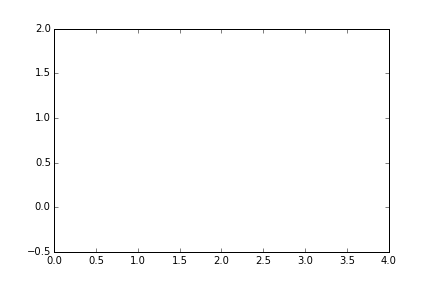
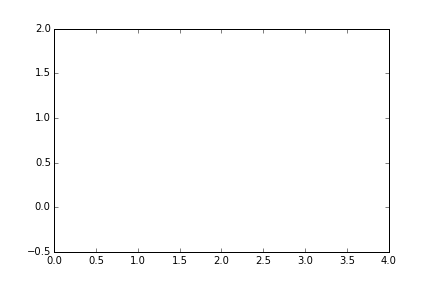
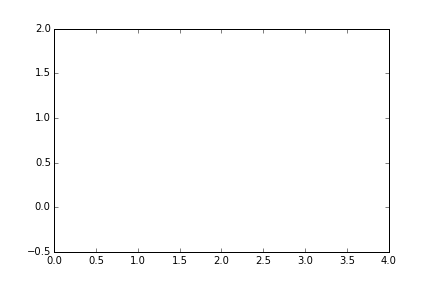
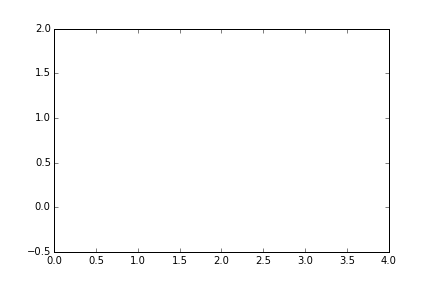
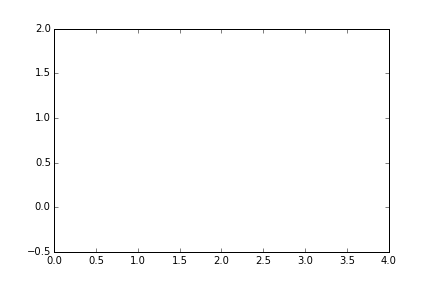
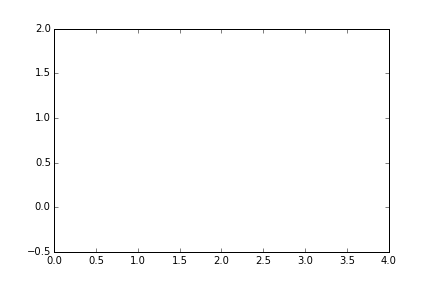
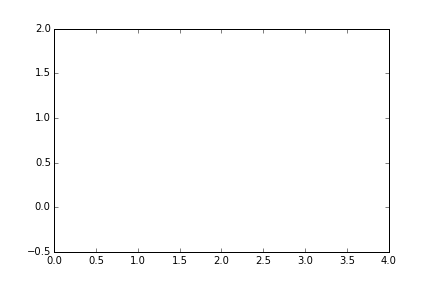

In [19]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx,1)

fig = PLT.figure();
ax = PLT.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')